In [1]:
# Chargement du jeu de données
import pandas as pd
df = pd.read_csv('data_projet.csv', sep=';', encoding='utf8')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# affichage des principales caractéristiques du jeu de données
display(df.shape)
display(df.head(5))
display(df.info())
display(df.describe())
display(df.describe(include='object'))

(19863, 11)

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commentaire    19834 non-null  object 
 1   star           19863 non-null  int64  
 2   date           19488 non-null  object 
 3   client         10215 non-null  object 
 4   reponse        8477 non-null   object 
 5   source         19863 non-null  object 
 6   company        19863 non-null  object 
 7   ville          4860 non-null   object 
 8   maj            5 non-null      object 
 9   date_commande  6686 non-null   object 
 10  ecart          6686 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


None

,star,ecart
count,19863.000000,6686.000000
mean,3.408398,14.286419
std,1.650531,10.373320
min,1.000000,1.000000
25%,1.000000,9.000000
50%,4.000000,12.000000
75%,5.000000,17.000000
max,5.000000,304.000000


,Commentaire,date,client,reponse,source,company,ville,maj,date_commande
count,19834,19488,10215,8477,19863,19863,4860,5,6686
unique,17174,1880,7569,2033,2,2,2457,5,385
top,Parfait,12/06/2020,Client,"Bonjour , Merci d'avoir partagé votre expérien...",TrustedShop,ShowRoom,Paris,30/04/2021,19/08/2020
freq,284,257,31,1162,14503,16823,110,1,73


In [4]:
# affichage des valeurs uniques pour les colonnes 'company', 'source' et 'maj'
print(df['company'].unique())
print(df['source'].unique())
print(df['maj'].unique())

['ShowRoom' 'VeePee']
['TrustPilot' 'TrustedShop']
[nan '30/04/2021' '24/04/2021' '15/04/2021' '26/02/2021' '23/02/2021']


In [5]:
# 2 company étudiées ShowRoom et VeePee
# 2 sites stockent des commentaires : TrustPilot et TrustedShop

In [6]:
print(df['source'][df['company']=='ShowRoom'].unique())
print(df['source'][df['company']=='VeePee'].unique())
# quand company = ShowRoom les avis peuvent être fait sur TrustPilot et TrustedShop
# quand company = VeePee les avis peuvent être fait sur TrustPilot

['TrustPilot' 'TrustedShop']
['TrustPilot']


In [7]:
# calcul des % de NaN de chaque colonne 
colonne = df.columns
NaN = [round((df[i].isna().sum()/len(df))*100, 2) for i in colonne]
NaN

[0.15, 0.0, 1.89, 48.57, 57.32, 0.0, 0.0, 75.53, 99.97, 66.34, 66.34]

In [8]:
# association des % aux noms de variable dans un dictionnaire
result_NaN = {}
for i, j in zip(colonne, NaN):
    result_NaN[i] = j

In [9]:
result_NaN

{'Commentaire': 0.15,
 'star': 0.0,
 'date': 1.89,
 'client': 48.57,
 'reponse': 57.32,
 'source': 0.0,
 'company': 0.0,
 'ville': 75.53,
 'maj': 99.97,
 'date_commande': 66.34,
 'ecart': 66.34}

In [10]:
# affichage des % de NaN dans un DataFrame
df_NaN = pd.DataFrame.from_dict(result_NaN, orient='index')
df_NaN

,0
Commentaire,0.15
star,0.00
date,1.89
client,48.57
reponse,57.32
source,0.00
company,0.00
ville,75.53
maj,99.97
date_commande,66.34


In [11]:
# intuitivement il semble que les colonnes date commande et écart soient renseignés ensemble
# et qu'ils soient renseignés pour une seule company. On peut le vérifier
print(df[['source', 'company']][df['date_commande'].isna()==False].value_counts())
print(df[['source', 'company']][df['ecart'].isna()==False].value_counts())

source       company 
TrustedShop  ShowRoom    6686
dtype: int64
source       company 
TrustedShop  ShowRoom    6686
dtype: int64


In [12]:
# on peut aussi procéder par un groupby qui permet de voir un peu mieux la répartition des dates de commande et des écarts
df.groupby(by=['source', 'company']).agg({'date_commande' : 'count', 'star' : 'count'})

date_commande   star
source      company                       
TrustPilot  ShowRoom              0   2320
            VeePee                0   3040
TrustedShop ShowRoom           6686  14503

In [13]:
# les colonnes date_commande et écart ne semble pas apporter grand chose. on va toute de même les garder car il est possible
# qu'ils y ait une corrélation entre le commentaire, la star et l'écart

In [14]:
# les colonnes maj et date_commande n'ayant que peut d'intérêt (car trop de valeur NaN pour maj et ecart suffit pour date_commande)
# on peut donc supprimer ces 2 colonnes
# les lignes sans commentaires peuvent être supprimées car ne représentent que 0.15% du DataSet
# les lignes sans date peuvent être supprimées car elles ne représentent que 1.89% du data set

In [15]:
df_clean1 = df.drop(columns=['maj', 'date_commande'], axis=1)
df_clean1 = df_clean1.dropna(subset=['Commentaire', 'date'])

In [16]:
# dans la colonne date une partie des données est au format dd/mm/yyyy et l'autre partie est au format yyyy-mm-dd
# nous allons donc convertir les données qui sont au format dd/mm/yyyy au format yyyy-mm-dd

df_clean1['date'][df_clean1['date'].str.contains('-')==False] = df_clean1['date'][df_clean1['date'].str.contains('-')==False].apply(lambda x: x[0:2]+'-'+x[3:5]+'-'+x[6:10])

In [17]:
# on vérifie que toutes les données ont bien été transformées
df_clean1['date'][df_clean1['date'].str.contains('/')==True]

Series([], Name: date, dtype: object)

In [18]:
# on les mets sur 10 caractères pour que l'on puisse les trasnformer à un format datetime
df_clean1['date'] = df_clean1['date'].apply(lambda x : x[0:11])

# puis on les convertit à un format datetime
df_clean1['date'] = pd.to_datetime(df_clean1['date'])

In [19]:
#on vérifie le nb de données et leur type
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19459 entries, 0 to 19862
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Commentaire  19459 non-null  object        
 1   star         19459 non-null  int64         
 2   date         19459 non-null  datetime64[ns]
 3   client       10062 non-null  object        
 4   reponse      8360 non-null   object        
 5   source       19459 non-null  object        
 6   company      19459 non-null  object        
 7   ville        4735 non-null   object        
 8   ecart        6686 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [20]:
# on calcule le min est le max pour avoir la plage de date couverte
print("la date min des commentaires est : ", df_clean1['date'].min(), "\nla date min des commentaires est : ",df_clean1['date'].max())

la date min des commentaires est :  2015-10-02 00:00:00 
la date min des commentaires est :  2021-12-05 00:00:00


In [21]:
# on rajoute une colonne avec seulement l'année du commentaire ce qui permettra d'étudier plus facilement les commentaires 
df_clean1['year'] = df_clean1['date'].dt.year

la distribution des commentaires par année es la suivante :
 2020    13719
2021     3424
2019     1163
2018      493
2017      361
2016      232
2015       67
Name: year, dtype: int64


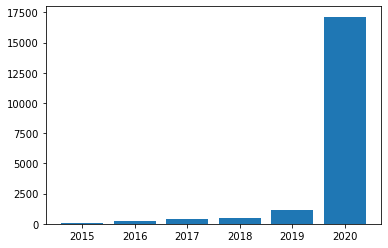

In [22]:
# on regarde la répartition des commentaires sur les différentes années
print("la distribution des commentaires par année es la suivante :\n", df_clean1['year'].value_counts())

# on peut afficher les résultats de la distribution des commentaires par année dans un histogramme
plt.hist(df_clean1['year'], rwidth=0.8, bins=6, align='left');

star,1,2,3,4,5
company,,,,,
ShowRoom,2654,1057,1632,3495,7602
VeePee,2434,224,70,105,186


star,1,2,3,4,5
company,,,,,
ShowRoom,0.16,0.06,0.10,0.21,0.46
VeePee,0.81,0.07,0.02,0.03,0.06


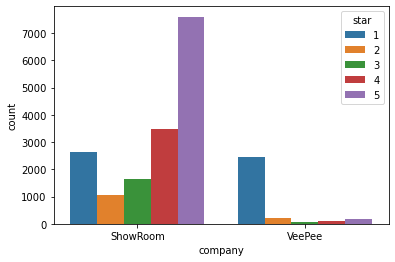

In [23]:
# on peut aussi étudier la répartition de l'attribution des étoiles selon les company, les sources et les années 
display(pd.crosstab(df_clean1['company'], df_clean1['star']))
display(round(pd.crosstab(df_clean1['company'], df_clean1['star'], normalize=0), 2))

# affichage sur un graphique la distribution des star pour chaque company
sns.countplot(x='company', data=df_clean1, hue='star');

star,1,2,3,4,5
source,,,,,
TrustPilot,4424,374,107,155,271
TrustedShop,664,907,1595,3445,7517


star,1,2,3,4,5
source,,,,,
TrustPilot,0.83,0.07,0.02,0.03,0.05
TrustedShop,0.05,0.06,0.11,0.24,0.53


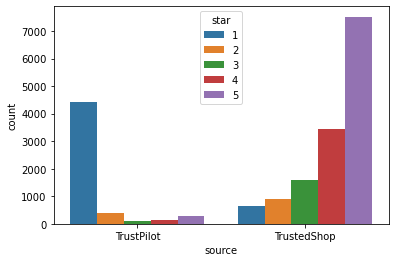

In [24]:
# on peut faire de même avec la répartition de l'attribution des étoiles selon les sources
display(pd.crosstab(df_clean1['source'], df_clean1['star']))
display(round(pd.crosstab(df_clean1['source'], df_clean1['star'], normalize=0), 2))

# affichage sur un graphique la distribution des star pour chaque source
sns.countplot(x='source', data=df_clean1, hue='star');

In [25]:
df.groupby(by=['source', 'company', 'star']).agg({'star' : 'count'})

star
source      company  star      
TrustPilot  ShowRoom 1     1994
                     2      150
                     3       37
                     4       50
                     5       89
            VeePee   1     2443
                     2      224
                     3       73
                     4      110
                     5      190
TrustedShop ShowRoom 1      685
                     2      935
                     3     1637
                     4     3545
                     5     7701